In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcardcsvpresent.csv')
df

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


In [3]:
df.shape


(3075, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   object 
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   object 
 6   isHighRiskCountry               3075 non-null   object 
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


In [5]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [6]:
dfFraud = df.loc[df.isFradulent == 'Y']
dfNonFraud = df.loc[df.isFradulent == 'N']

In [7]:
dfFraud.shape

(448, 11)

In [8]:
dfNonFraud.shape

(2627, 11)

In [9]:
df.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


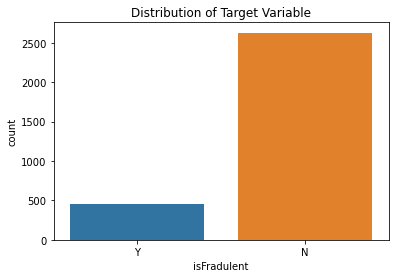

In [10]:
sns.countplot(x='isFradulent', data=df)
plt.title('Distribution of Target Variable')
plt.show()

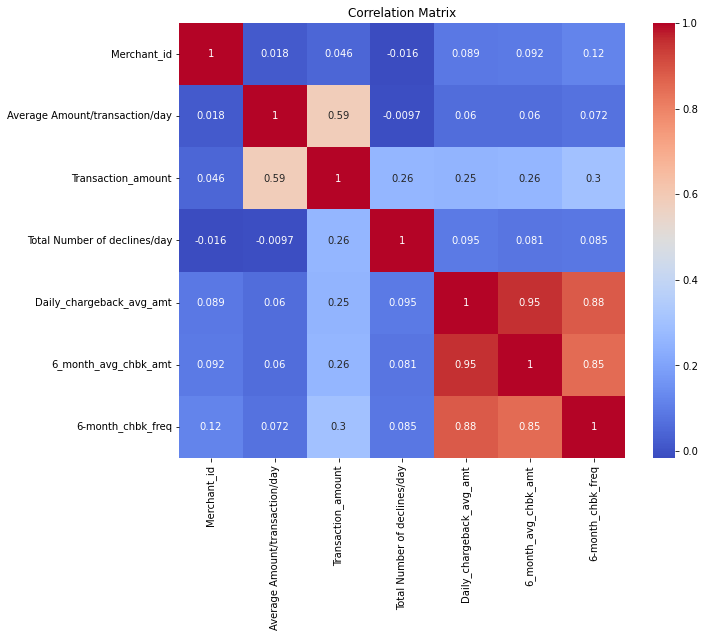

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
categorical_features = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']

In [13]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [14]:
df

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1
...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,1,0,0,0,754,585.0,7,0
3071,6661273532,800.0,0.0,1,0,0,0,754,585.0,7,0
3072,6661273533,800.0,20800.0,1,0,0,0,754,585.0,7,0
3073,6661273532,1500.0,12000.0,1,0,1,1,754,585.0,7,0


In [15]:
X_hbn=df.drop('isFradulent',axis=1)
y_hbn=df['isFradulent']

In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_hbn)


In [17]:
scaled_X

array([[-1.89133721, -1.42200799, -0.67856862, ..., -0.26978337,
        -0.25664688, -0.25310881],
       [-1.89133721, -1.42200799, -0.55028357, ..., -0.26978337,
        -0.25664688, -0.25310881],
       [-1.8913363 , -1.12905883, -0.49867351, ..., -0.26978337,
        -0.25664688, -0.25310881],
       ...,
       [ 1.65630811,  0.97640623,  1.07794974, ...,  3.37976021,
         3.49471235,  4.26819179],
       [ 1.65630811,  3.37482045,  0.20955864, ...,  3.37976021,
         3.49471235,  4.26819179],
       [ 1.65630811,  3.37482045,  2.577898  , ...,  3.37976021,
         3.49471235,  4.26819179]])

In [18]:
scaled_X_df = pd.DataFrame(scaled_X, columns=X_hbn.columns)
X_hbn=scaled_X_df
X_hbn

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,-1.891337,-1.422008,-0.678569,-0.137429,1.844224,1.831809,3.741657,-0.269783,-0.256647,-0.253109
1,-1.891337,-1.422008,-0.550284,-0.137429,1.844224,1.831809,3.741657,-0.269783,-0.256647,-0.253109
2,-1.891336,-1.129059,-0.498674,7.276494,1.844224,-0.545908,-0.267261,-0.269783,-0.256647,-0.253109
3,-1.891235,-1.129059,-0.480368,7.276494,3.212815,-0.545908,-0.267261,-0.269783,-0.256647,-0.253109
4,-1.891134,-0.051486,1.591090,-0.137429,-0.436762,1.831809,3.741657,3.602411,4.085952,3.622292
...,...,...,...,...,...,...,...,...,...,...
3070,1.656308,-0.051486,0.110878,7.276494,-0.436762,-0.545908,-0.267261,3.379760,3.494712,4.268192
3071,1.656308,0.976406,-0.974611,7.276494,-0.436762,-0.545908,-0.267261,3.379760,3.494712,4.268192
3072,1.656308,0.976406,1.077950,7.276494,-0.436762,-0.545908,-0.267261,3.379760,3.494712,4.268192
3073,1.656308,3.374820,0.209559,7.276494,-0.436762,1.831809,3.741657,3.379760,3.494712,4.268192


<AxesSubplot:xlabel='isFradulent', ylabel='count'>

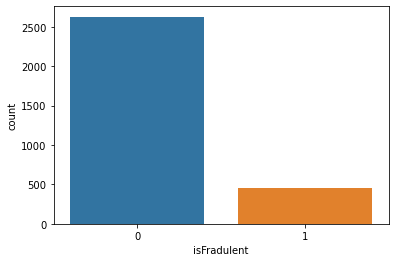

In [19]:
sns.countplot(x=y_hbn)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_hbn, y_hbn, test_size=0.2, random_state=42)

In [21]:
oversampler = RandomOverSampler(random_state=21)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='isFradulent', ylabel='count'>

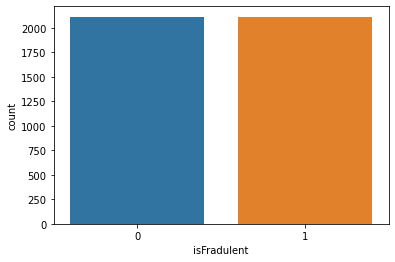

In [22]:
sns.countplot(x=y_resampled)

In [23]:

param_grid = {'var_smoothing': [1e+10,1e+11]}

hidden_naive_bayes = GaussianNB()

grid_search = GridSearchCV(hidden_naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [24]:
y_pred_hbn= best_model.predict(X_test)

In [25]:
y_pred_hbn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [26]:
accuracy = accuracy_score(y_test, y_pred_hbn)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_hbn)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_hbn)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_hbn)
print("F1-score:", f1)

Accuracy: 0.8682926829268293
Precision: 0.9583333333333334
Recall: 0.22330097087378642
F1-score: 0.36220472440944884


In [27]:
cm = confusion_matrix(y_test, y_pred_hbn)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[511   1]
 [ 80  23]]


In [28]:
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

In [29]:
cm_df

,Predicted 0,Predicted 1
Actual 0,511,1
Actual 1,80,23


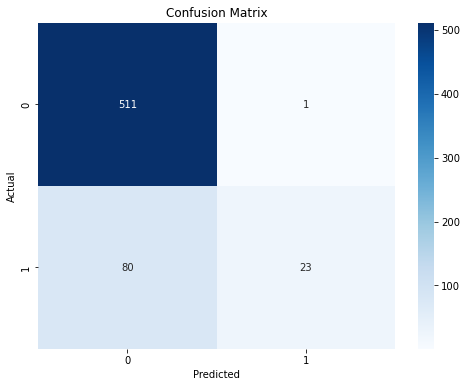

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'])

plt.show()

In [31]:
report = classification_report(y_test,y_pred_hbn)

print(report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       512
           1       0.96      0.22      0.36       103

    accuracy                           0.87       615
   macro avg       0.91      0.61      0.64       615
weighted avg       0.88      0.87      0.83       615



# BAYESIAN BELIEF NETWORK

In [32]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin
class BBNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.bbn_model = None

    def fit(self, X, y):
        self.bbn_model = BayesianModel()
        col = df.columns
        states = {col[i]: ['0', '1'] for i in range(len(col) - 1)} 
        self.bbn_model.add_nodes_from(states.keys())
        for i in range(len(col) - 1):
            self.bbn_model.add_edge(col[i], col[i + 1])
        self.bbn_model.fit(df, estimator=MaximumLikelihoodEstimator, complete_samples_only=False)
        return self

    def predict(self, X):
        return self.bbn_model.predict(X)

In [34]:

col=df.columns
X=df.drop('isFradulent',axis=1)
y=df['isFradulent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
oversampler = RandomOverSampler(random_state=21)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)


In [35]:
bbn_classifier = BBNClassifier()
bbn_classifier.fit(X_train_over, y_train_over)

predictions = bbn_classifier.predict(X_test)

100%|████████████████████████████████████████████████████████████████████████████████| 615/615 [05:36<00:00,  1.83it/s]


In [47]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


precision = precision_score(y_test, predictions)
print("Precision:", precision)


recall = recall_score(y_test, predictions)
print("Recall:", recall)


f1 = f1_score(y_test, predictions)
print("F1-score:", f1)

Accuracy: 0.8959349593495934
Precision: 0.8518518518518519
Recall: 0.27710843373493976
F1-score: 0.41818181818181815


In [ ]:
cm = confusion_matrix(predictions,y_test)
print("Confusion Matrix:")
print(cm)

In [45]:
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

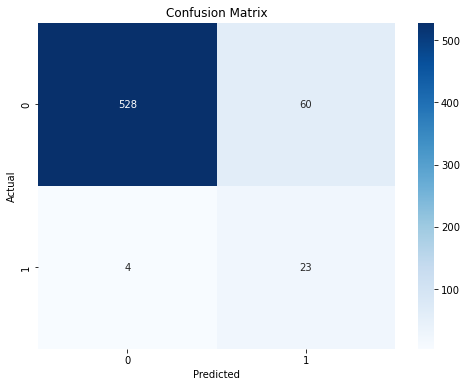

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'])

plt.show()

In [42]:
report = classification_report(predictions,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       588
           1       0.28      0.85      0.42        27

    accuracy                           0.90       615
   macro avg       0.63      0.87      0.68       615
weighted avg       0.96      0.90      0.92       615

